# Some Object Recognizers
Source of some examples: https://github.com/chewbacca89/OpenCV-with-Python

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [18]:
# display a list of images side by side
def preview(imgs, size=22, xlim=None, ylim=None):
    fig, axes = plt.subplots(1, len(imgs), figsize=(size, size))
    
    # if there is only one subplot, axes is not list
    # therefore, we make it a list
    if(len(imgs) == 1):
        axes = [axes]
    
    for i in range(len(imgs)):
        img = imgs[i]
        
        # zoom into image if limits are set
        if(xlim is not None):
            axes[i].set_xlim(xlim)
        if(ylim is not None):
            axes[i].set_ylim(ylim)
            
        # convert image to RGB if it is not grayscale
        if(len(img.shape) > 2):
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i].imshow(img)
        else:
            axes[i].imshow(img, 'gray')

In [19]:
matplotlib.rcParams['figure.figsize'] = [12, 8]
def show(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

def showg(img):
    plt.imshow(img, cmap='gray')

def showb(img):
    plt.imshow(img, cmap='Greys', interpolation='nearest')

# Marker Detection

If in doubt: use [ArUco](https://www.uco.es/investiga/grupos/ava/node/26) markers:

- developed at Universidad de Córdoba
- simple, fast (C++)
- partially supported out-of-the-box in OpenCV (cv2.aruco)
- important: choose distinct markers (Hamming distance large)

In-depth tutorial: https://www.pyimagesearch.com/2020/12/21/detecting-aruco-markers-with-opencv-and-python/

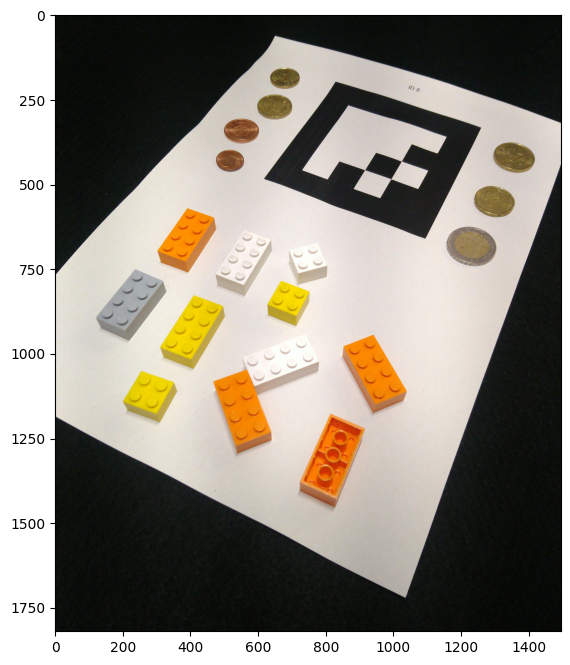

In [20]:
image = cv2.imread("images/lego_coins_aruco_perspective.jpg")
image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC )
show(image)

In [21]:
dic = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_100)

In [22]:
corners, marker_ids, unidentified = cv2.aruco.detectMarkers(image, dic)
print(marker_ids)
print(corners)

AttributeError: module 'cv2.aruco' has no attribute 'detectMarkers'

In [ ]:
detected = cv2.aruco.drawDetectedMarkers(image, corners, marker_ids)
show(detected)

NameError: name 'corners' is not defined

# Template Matching

In [ ]:
beach = cv2.imread('images/WaldoBeach.jpg')
show(beach)

In [ ]:
waldo = cv2.imread('images/waldo.jpg')
show(waldo)

In [ ]:
beach_gray = cv2.cvtColor(beach, cv2.COLOR_BGR2GRAY)
waldo_gray = cv2.cvtColor(waldo, cv2.COLOR_BGR2GRAY)

result = cv2.matchTemplate(beach_gray, waldo_gray, cv2.TM_CCOEFF)
show(result)

In [ ]:
result = np.interp(result, (result.min(), result.max()), (0, 255)).astype(int)
#result
showg(result)

In [ ]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
print(min_val, max_val, min_loc, max_loc)

In [ ]:
top_left = max_loc
bottom_right = (max_loc[0] + 50, max_loc[1] + 50)
found = cv2.rectangle(beach, top_left, bottom_right, (0,0,255), 5)
show(found)

In [ ]:
xmin, ymin = top_left
xmax, ymax = bottom_right
cropped = found[ymin:ymax,xmin:xmax]
show(cropped)

**Warning:** this does not work reliably!

# Face Recognition using Haar Cascades

In-depth tutorial: https://www.pyimagesearch.com/2021/04/12/opencv-haar-cascades/

In [ ]:
# !pip install opencv-contrib-python  # for Haar cascades

In [ ]:
# We point OpenCV's CascadeClassifier function to where our 
# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load our image then convert it to grayscale
image = cv2.imread('images/Hillary.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if len(faces) == 0:
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    image = cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)

show(image)
# see also: cvlib.detect_face()

# Deep Neural Networks

- OpenCV supports various DNNs
- nice wrapper: https://www.cvlib.net/
- if in doubt: [YOLO](https://pjreddie.com/darknet/yolo/)

Image: https://commons.wikimedia.org/wiki/File:Traffic_Jam_in_Nairobi.jpg

In [ ]:
# requires cvlib, OpenCV tensorflow and CUDA support (libcudart.so.11.0 on Linux)
# downloads required data on first run
import cvlib as cvl
from cvlib.object_detection import draw_bbox

img = cv2.imread("images/food.jpg")
bbox, label, conf = cvl.detect_common_objects(img, confidence=0.3, model='yolov3-tiny')
print(label)
output_image = draw_bbox(img, bbox, label, conf)
show(output_image)

In [ ]:
# see also: https://jacquesmattheij.com/sorting-two-metric-tons-of-lego/


# Our Task

Detect and identify lego pieces and coins in the example image

In [ ]:
image = cv2.imread("images/lego_coins_aruco.jpg")
image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC )
show(image)